# Predicting University Students’ Knowledge of DC Machines

Section 006, Group 27

Chantal Raoux 417234, Yui Mikuriya 65625832, Ryan Pfortmueller 83929604, Serena Zhang 72127699

## Loading the necessary libraries for our project and setting the seed

In [1]:
set.seed(4)
library(tidyverse)
library(repr)
library(tidymodels)
library(readxl)
library(cowplot)
library(ggplot2)
library(digest)
options(repr.matrix.max.rows = 6)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.7     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

── Attaching packages ────────────────────────────────────── tidymodels 1.0.0 ──

✔ broom        1.0.0     ✔ rsample      1.0.0
✔ dials        1.0.0     ✔ tune         1.0.0
✔ infer        1.0.2     ✔ workflows    1.0.0
✔ modeldata    1.0.0     ✔ workflowsets 1.0.0
✔ parsnip      1.0.0     ✔ yardstick    1.0.0
✔ recipes      1.0.1     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filter()   masks stats::filter()
✖ recipes::fixed()  masks stringr::fixed()
✖ dplyr::lag()      masks stats::lag()
✖ yardstick::spec() masks r

### Background Information

A DC Machine is an energy conversion device that converts electrical energy to mechanical energy (Byju's, 2022). DC machines typically consist of a generator (which converts electrical energy to mechanical energy) and a motor (which converts mechanical energy to electrical energy). DC machines are typically used in settings where high starting torque and accurate speed control over a wide range are important. Some examples of the usage of DC machines include: elevators, steel mills, rolling mills, locomotives, and excavators. 

The goal of our project is to predict the degree of knowledge students have of electrical DC machines defined by the variable “class”. 403 university students were tested on their knowledge of DC machines through exam performances of the goal object and related goal object. Based on this, we aim to answer the question: how does the relationship between the exam performance levels of the goal object and related goal objects affect the user’s Electrical DC Machines knowledge level? If we are able to examine the goal object and related goal objects, then we can predict the knowledge level of participants. 

To answer the question, we will use the dataset `Data_User_Modeling_Dataset_Hamdi Tolga KAHRAMAN.xls`. This database, created by the University of California, aims to study and measure the knowledge level of students regarding Electrical DC Machines. In order to predict the root of the student's knowledge levels, they collected data from 5 predictors:

- STG - The degree of study time for goal object material. 
- SCG - The degree of repetition number of user for goal object material. 
- STR - The degree of study time of user for related objects with goal object.
- LPR - The exam performance of user for related objects with goal object.
- PEG - The exam performance of user for goal object.
- Class(UGC) - The knowledge level of user.

The degree of knowledge can be predicted by examining the exam performance of the use for a related goal object (LPR) and examining the performance for the goal object (PEG). The student’s level of knowledge includes: very low, low, middle, and high. 



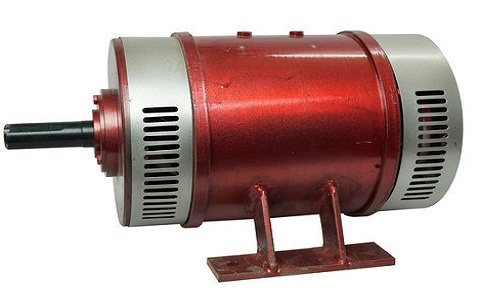


## Overview of Our Methods

First, we will read our data set and then clean and wrangle our data. Then we select only the required columns that we need for our analysis and convert the variable "class" into a factor. We will then use k-nearest neighbour classification to predict the ideal k value and accuracy of our prediction. The methodology is explained throughout the document.

### Reading and wrangling our data set

Our dataset can be found in the machine learning database. Rather than loading the dataset from a local environment, we directly imported it from the web. Since our data is already split into training and test data, we specify that we will be using *training* data at the start. Our data contains extra columns so we will be specifying which ones we would like to use. Since we don't have to manually split the testing and training data, we download both data sets to prepare for use. 

In [2]:
print( "Table 1: Loading the training data used in this dataset")
url <- "https://archive.ics.uci.edu/ml/machine-learning-databases/00257/Data_User_Modeling_Dataset_Hamdi%20Tolga%20KAHRAMAN.xls"

download.file(url, destfile = "Knowledge.xls")

# Selecting the training data from sheet 2
knowledge_train <- read_excel(path = "Knowledge.xls", sheet = 2)

# renaming the variable "very_low" to "Very Low" in order to facilitate data analysis with test data later on
knowledge_train$UNS<- recode(knowledge_train$UNS,
                          "very_low" = "Very Low")
knowledge_train


print("Table 2: Loading the testing data of the dataset")
url<-"https://archive.ics.uci.edu/ml/machine-learning-databases/00257/Data_User_Modeling_Dataset_Hamdi%20Tolga%20KAHRAMAN.xls"
download.file(url, destfile = "Knowledge.xls")
knowledge_test<- read_excel(path="Knowledge.xls", sheet=3)
knowledge_test





[1] "Table 1: Loading the training data used in this dataset"


New names:
• `` -> `...7`
• `` -> `...8`


STG,SCG,STR,LPR,PEG,UNS,...7,...8,Attribute Information:
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<lgl>,<lgl>,<chr>
0.00,0.00,0.00,0.00,0.00,Very Low,NA,NA,"STG (The degree of study time for goal object materails),"
0.08,0.08,0.10,0.24,0.90,High,NA,NA,SCG (The degree of repetition number of user for goal object materails)
0.06,0.06,0.05,0.25,0.33,Low,NA,NA,STR (The degree of study time of user for related objects with goal object)
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
0.54,0.82,0.71,0.29,0.77,High,NA,NA,NA
0.50,0.75,0.81,0.61,0.26,Middle,NA,NA,NA
0.66,0.90,0.76,0.87,0.74,High,NA,NA,NA


[1] "Table 2: Loading the testing data of the dataset"


New names:
• `` -> `...7`
• `` -> `...8`


STG,SCG,STR,LPR,PEG,UNS,...7,...8,Attribute Information:
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<lgl>,<lgl>,<chr>
0.00,0.10,0.50,0.26,0.05,Very Low,NA,NA,"STG (The degree of study time for goal object materails),"
0.05,0.05,0.55,0.60,0.14,Low,NA,NA,SCG (The degree of repetition number of user for goal object materails)
0.08,0.18,0.63,0.60,0.85,High,NA,NA,STR (The degree of study time of user for related objects with goal object)
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
0.56,0.60,0.77,0.13,0.32,Low,NA,NA,NA
0.66,0.68,0.81,0.57,0.57,Middle,NA,NA,NA
0.68,0.64,0.79,0.97,0.24,Middle,NA,NA,NA


The table above consists of some columns of data that we don't need, so we need to select columns that only contain the variables that we need. In this case, we need the columns STG, SCG, STR, LPR, PEG, and class, so we will use the `mutate` and `select` functions to select the columns needed.

In [31]:
# Selecting and factoring the necessary columns for our data analysis
# print("Table 2.1: The filtered data set containing only the required variables")
# knowledge_training <- mutate(knowledge_train, class=UNS) |>
#          select(STG, SCG, PEG,class) 
# knowledge_training

# print("Table 2.2: The filtered testing data set")
# knowledge_testing<-mutate(knowledge_test, class=UNS)|>
#     select(STG, SCG, PEG, class)
# knowledge_testing

print("Table 2.1: The filtered data set containing only the required variables")
knowledge_training <- mutate(knowledge_train, class=UNS) |>
         select(LPR, PEG,class) 
knowledge_training

print("Table 2.2: The filtered testing data set")
knowledge_testing<-mutate(knowledge_test, class=UNS)|>
    select(LPR, PEG, class)
knowledge_testing

[1] "Table 2.1: The filtered data set containing only the required variables"


LPR,PEG,class
<dbl>,<dbl>,<chr>
0.00,0.00,Very Low
0.24,0.90,High
0.25,0.33,Low
⋮,⋮,⋮
0.29,0.77,High
0.61,0.26,Middle
0.87,0.74,High


[1] "Table 2.2: The filtered testing data set"


LPR,PEG,class
<dbl>,<dbl>,<chr>
0.26,0.05,Very Low
0.60,0.14,Low
0.60,0.85,High
⋮,⋮,⋮
0.13,0.32,Low
0.57,0.57,Middle
0.97,0.24,Middle


Next, we used `mutate` and `as_factor` to convert the variable `class` into a factor. 

In [32]:
print("Table 2.3: The training data set with class as a factor")
knowledge_training <- knowledge_training[order(knowledge_training$class),] |> mutate(class = as.factor(class))
knowledge_training

print("Table 2.4: The testing data set with class as a factor")
knowledge_testing <- knowledge_testing[order(knowledge_testing$class),] |> mutate(class = as.factor(class))
knowledge_testing

[1] "Table 2.3: The training data set with class as a factor"


LPR,PEG,class
<dbl>,<dbl>,<fct>
0.24,0.90,High
0.20,0.85,High
0.30,0.81,High
⋮,⋮,⋮
0.55,0.09,Very Low
0.08,0.10,Very Low
0.48,0.11,Very Low


[1] "Table 2.4: The testing data set with class as a factor"


LPR,PEG,class
<dbl>,<dbl>,<fct>
0.60,0.85,High
0.67,0.85,High
0.30,0.90,High
⋮,⋮,⋮
0.07,0.09,Very Low
0.09,0.11,Very Low
0.10,0.10,Very Low


Using `group_by` and `summarize` we will find the distribution of data by counting the number of each `class` variable. The `mutate` term is also used to determine the percentage distribution.

In [33]:
print("Table 3.1: The distribution of the training data")
knowledge_train_proportions <- knowledge_training |>
                      group_by(class) |>
                      summarize(count = n()) |>
                      mutate(percent = 100*count/nrow(knowledge_training))
knowledge_train_proportions

print("Table 3.2: The distribution of the testing data")
knowledge_test_proportions <- knowledge_testing |>
                      group_by(class) |>
                      summarize(count = n()) |>
                      mutate(percent = 100*count/nrow(knowledge_test))
knowledge_test_proportions

[1] "Table 3.1: The distribution of the training data"


class,count,percent
<fct>,<int>,<dbl>
High,63,24.418605
Low,83,32.170543
Middle,88,34.108527
Very Low,24,9.302326


[1] "Table 3.2: The distribution of the testing data"


class,count,percent
<fct>,<int>,<dbl>
High,39,26.89655
Low,46,31.72414
Middle,34,23.44828
Very Low,26,17.93103


Our goal is to predict the class using STG, SCG, and PEG/ The different possible classes are:
- very low
- low
- middle
- high.

We cleaned and wrangled the data by selecting only the columns we required for our data analysis. The percent distribution of each of the knowledge classes was determined using the `mutate` term.

## Data Visualization

Next, the data will be visualized using a scatter plot.

[1] "Figure 1: Graph of LPR vs PEG and knowledge class"


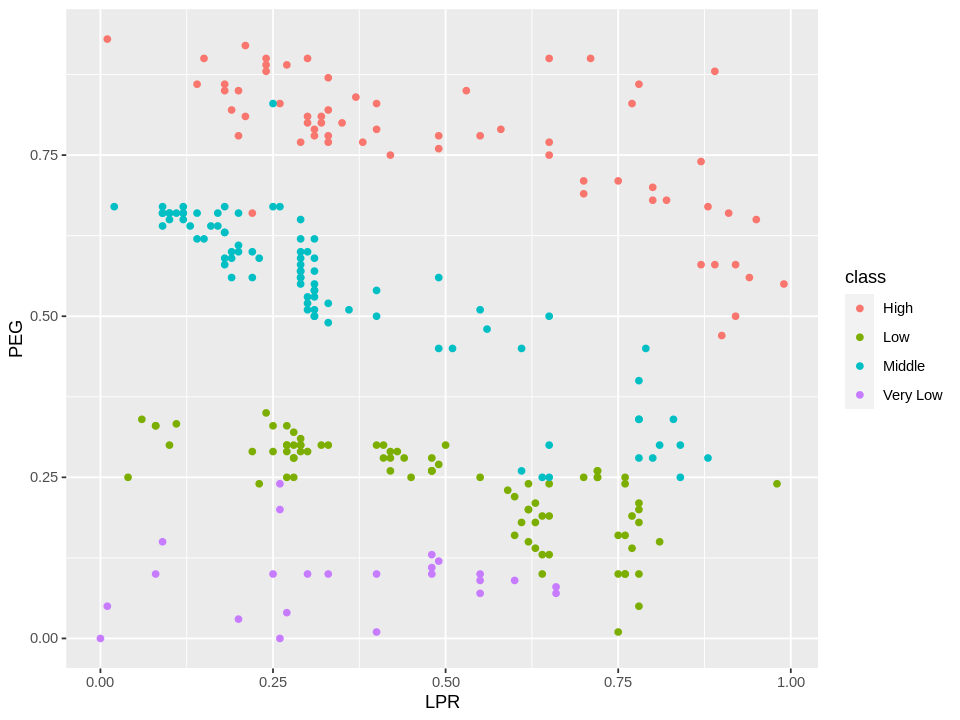

In [37]:
#visualizing initial plot to see which variable has highest influence
# print("Figure 1: Graph of SCG vs PEG and knowledge class")
# options(repr.plot.width = 8, repr.plot.height = 6)
# initial_plot <- ggplot(knowledge_training, aes(x= SCG, y= PEG, colour = class)) + 
#                       geom_point() +
#                       xlab("SCG") +
#                       ylab("PEG")
# initial_plot

print("Figure 1: Graph of LPR vs PEG and knowledge class")
options(repr.plot.width = 8, repr.plot.height = 6)
initial_plot <- ggplot(knowledge_training, aes(x= LPR, y= PEG, colour = class)) + 
                      geom_point() +
                      xlab("LPR") +
                      ylab("PEG")
initial_plot

We chose to use scatter plots as they best represented the relationship between the variables we chose. The scatter plots makes it easier to see the relationship between the variables and the knowledge classes. The knowledge classes were colour coded to help visualize the distribution. This is done to prepare for later steps, which are related to predicting the knowledge classes. 

## K-Nearest Neighbours Classification

In [39]:

# knowledge_recipe <- recipe(class~STG+PEG+SCG, data = knowledge_training) |>
#                   step_scale(all_predictors()) |>
#                   step_center(all_predictors())
# knowledge_recipe


knowledge_recipe <- recipe(class~LPR+PEG, data = knowledge_training) |>
                  step_scale(all_predictors()) |>
                  step_center(all_predictors())
knowledge_recipe


Recipe

Inputs:

      role #variables
   outcome          1
 predictor          2

Operations:

Scaling for all_predictors()
Centering for all_predictors()

In [40]:
#Training the classifier

#model specification

knn_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = 5) |>
  set_engine("kknn") |>
  set_mode("classification")

knn_fit <- workflow() |>
  add_recipe(knowledge_recipe) |>
  add_model(knn_spec) |>
  fit(data = knowledge_training)

knn_fit


══ Workflow [trained] ══════════════════════════════════════════════════════════
Preprocessor: Recipe
Model: nearest_neighbor()

── Preprocessor ────────────────────────────────────────────────────────────────
2 Recipe Steps

• step_scale()
• step_center()

── Model ───────────────────────────────────────────────────────────────────────

Call:
kknn::train.kknn(formula = ..y ~ ., data = data, ks = min_rows(5,     data, 5), kernel = ~"rectangular")

Type of response variable: nominal
Minimal misclassification: 0.04263566
Best kernel: rectangular
Best k: 5

In [41]:
#Predict the data using the test 
knowledge_test_predictions <- predict(knn_fit, knowledge_testing) |>
  bind_cols(knowledge_testing)

# knowledge_test_predictions <- knowledge_test_predictions[order(knowledge_test_predictions$.pred_class),]
knowledge_test_predictions

.pred_class,LPR,PEG,class
<fct>,<dbl>,<dbl>,<fct>
High,0.60,0.85,High
High,0.67,0.85,High
High,0.30,0.90,High
⋮,⋮,⋮,⋮
Very Low,0.07,0.09,Very Low
Very Low,0.09,0.11,Very Low
Very Low,0.10,0.10,Very Low


We predicted the data using the test.

### Assessing the quality of our model

In [42]:
#accessing the quality of our model
knowledge_test_predictions |>
  metrics(truth = class, estimate = .pred_class) |>
  filter(.metric == "accuracy")

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,multiclass,0.9724138


In [43]:
confusion <- knowledge_test_predictions |>
             conf_mat(truth = class, estimate = .pred_class)
confusion

          Truth
Prediction High Low Middle Very Low
  High       39   0      0        0
  Low         0  45      1        2
  Middle      0   1     33        0
  Very Low    0   0      0       24

## Using our Model

In [45]:

# create the 25/75 split of the training data into training and validation
knowledge_split <- initial_split(knowledge_training, prop = 0.75, strata = class)
knowledge_subtrain <- training(knowledge_split)
knowledge_validation <- testing(knowledge_split)

# recreate the standardization recipe from before 
# (since it must be based on the training data)
# knowledge_recipe <- recipe(class ~ ~ STG + PEG + SCG, 
#                         data = knowledge_subtrain) |>
#   step_scale(all_predictors()) |>
#   step_center(all_predictors())

knowledge_recipe <- recipe(class ~ ~ LPR+PEG, 
                        data = knowledge_subtrain) |>
  step_scale(all_predictors()) |>
  step_center(all_predictors())
# fit the knn model (we can reuse the old knn_spec model from before)
knn_fit <- workflow() |>
  add_recipe(knowledge_recipe) |>
  add_model(knn_spec) |>
  fit(data = knowledge_subtrain)

# get predictions on the validation data
validation_predicted <- predict(knn_fit, knowledge_validation) |>
  bind_cols(knowledge_validation)

# compute the accuracy
acc <- validation_predicted |>
  metrics(truth = class, estimate = .pred_class) |>
  filter(.metric == "accuracy") |>
  select(.estimate) |>
  pull()

acc

[1] 0.9846154

We created a 25/75 split of the training data into training data and validation data. Thus, we need to recreate the standardization recipe from before since our validation data must be based on the training data. We will use the old knn_spec model from before to do so. This allows us to receive predictions on the validation data and compute the accuracy of our data. 

In [46]:

knowledge_vfold <- vfold_cv(knowledge_training, v = 5, strata = class)

knowledge_recipe <- recipe(class ~ LPR+PEG, 
                        data = knowledge_training) |>
  step_scale(all_predictors()) |>
  step_center(all_predictors())

# fit the knn model 
knn_fit <- workflow() |>
  add_recipe(knowledge_recipe) |>
  add_model(knn_spec) |>
  fit_resamples(resamples = knowledge_vfold)

knn_fit


splits                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          

In [47]:
knn_fit |> 
  collect_metrics()

.metric,.estimator,mean,n,std_err,.config
<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
accuracy,multiclass,0.9456926,5,0.016920513,Preprocessor1_Model1
roc_auc,hand_till,0.9886616,5,0.004380334,Preprocessor1_Model1


In [48]:
knowledge_vfold <- vfold_cv(knowledge_training, v = 10, strata = class)

vfold_knn <- workflow() |>
                  add_recipe(knowledge_recipe) |>
                  add_model(knn_spec) |>
                  fit_resamples(resamples = knowledge_vfold) |>
                  collect_metrics()

vfold_knn

! Fold06: internal:
  No observations were detected in `truth` for level(s): 'Very Low'
  Computation will proceed by ignoring those levels.



.metric,.estimator,mean,n,std_err,.config
<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
accuracy,multiclass,0.9568571,10,0.009391461,Preprocessor1_Model1
roc_auc,hand_till,0.9909105,10,0.004418073,Preprocessor1_Model1


In this case, using 10-fold instead of 5-fold cross-validation did reduce the standard error by a very slight amount. Using 10-fold instead of 5-fold cross-validation reduces the standard error. However, increasing folds also takes longer to compute, so we choose 10 to reduce error while also not taking too long to compute.

In [49]:
knn_spec_2 <- nearest_neighbor(weight_func = "rectangular", 
                             neighbors = tune()) |>
  set_engine("kknn") |>
  set_mode("classification")
knn_spec_2

K-Nearest Neighbor Model Specification (classification)

Main Arguments:
  neighbors = tune()
  weight_func = rectangular

Computational engine: kknn 


In [50]:
k_vals <- tibble(neighbors = seq(from = 1, to = 100, by = 5))

knn_results <- workflow() |>
  add_recipe(knowledge_recipe) |>
  add_model(knn_spec_2) |>
  tune_grid(resamples = knowledge_vfold, grid = k_vals) |>
  collect_metrics() 

knn_accuracies <- knn_results |>
  filter(.metric == "accuracy")

knn_accuracies

! Fold06: internal:
  No observations were detected in `truth` for level(s): 'Very Low'
  Computation will proceed by ignoring those levels.



neighbors,.metric,.estimator,mean,n,std_err,.config
<dbl>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
1,accuracy,multiclass,0.9537143,10,0.012351981,Preprocessor1_Model01
6,accuracy,multiclass,0.9568571,10,0.009391461,Preprocessor1_Model02
11,accuracy,multiclass,0.9494396,10,0.010270378,Preprocessor1_Model03
⋮,⋮,⋮,⋮,⋮,⋮,⋮
86,accuracy,multiclass,0.6316484,10,0.01928779,Preprocessor1_Model18
91,accuracy,multiclass,0.6042308,10,0.02782445,Preprocessor1_Model19
96,accuracy,multiclass,0.5922308,10,0.02929797,Preprocessor1_Model20


We notice that as the number of neighbours increases, the accuracy of our model decreases. Therefore, we need graph accuracy vs k to help visualize the ideal k value for the most accurate computation.

## Finding the ideal K value

We can decide which number of neighbours is best by plotting the accuracy versus K as shown in Figure 2 below.

[1] "Figure 2: Graph of accuracy vs k to find ideal k value"


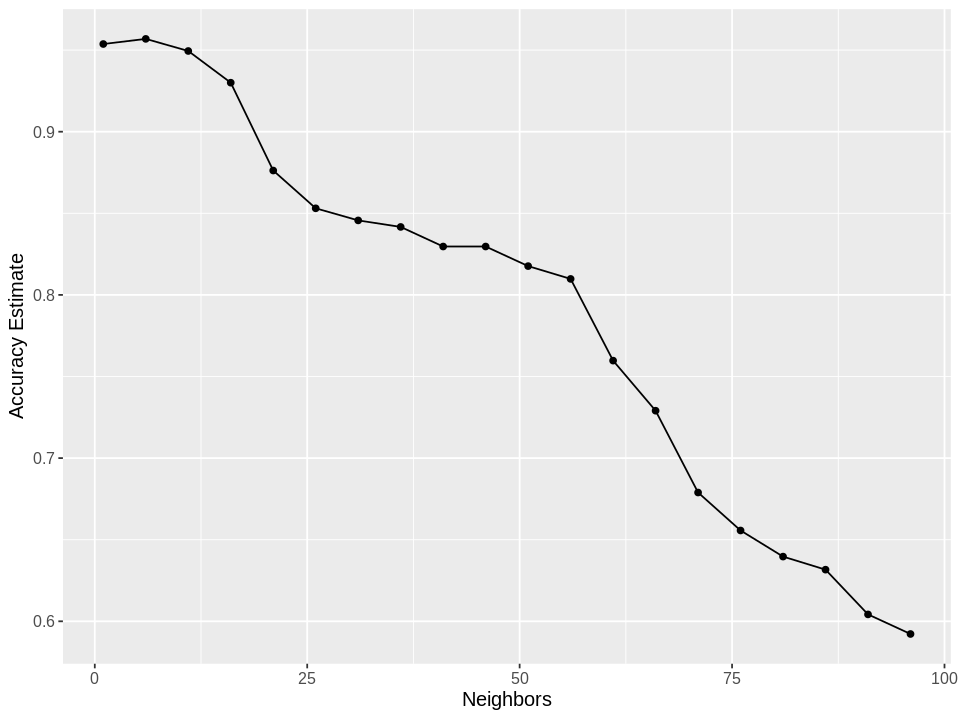

In [51]:
print("Figure 2: Graph of accuracy vs k to find ideal k value")

accuracy_and_k <- ggplot(knn_accuracies, aes(x = neighbors, y = mean)) +
  geom_point() +
  geom_line() +
  labs(x = "Neighbors", y = "Accuracy Estimate") + 
  theme(text = element_text(size = 12))

accuracy_and_k


Here we notice that k=5 gives us the highest accuracy on the graph. Therefore, we would use k=10 as the ideal k value. The k=10 does not drastically change when k values vary by 1, such as around 4 or 6 neighbours. 

## Discussion

### Findings

By looking at the graphs, we notice that there are correlations between some variables with the exam scores. Additionally, we notice that the ideal k value is around 5. The accuracy decreases much faster after k=10. We also found that the accuracy value was 0.98 which was expected.  

### Expected outcomes 

The accuracy value was expected because when comparing all the provided variables, we expected that the gained knowledge would be directly related to the amount of time spent studying the goal object and its exam performance. However, after plotting these variables, we found that there was no correlation between PEG, STG and the user's knowledge, as there could be other variables that affect exam performance. Alternatively, we observed that there is a significant positive relationship between LPR, PEG and the user's knowledge.

### Significance

We do not believe that the finding of this dataset will be very impactful. The relationship between knowledge and exam performance is not an accurate representation of knowledge retention. Factors such as test anxiety negatively impact a person's ability to score well on tests despite having a high degree of knowledge. Additionally, we believe that the amount of time a person studies any given material should have a significant impact on their knowledge. 

### Further questions 

Considering these factors, we may ask ourselves *are there better means of collecting this data or are there other more impactful factors that aren't being considered in this study?*

## References
##### These include citations for all images used, background information and the dataset we used

- Agarwal, T. (2019). DC Generator : Construction, Working Principle,Types, and Applications. Retrieved 10 April 2023, from https://www.elprocus.com/what-is-a-dc-generator-construction-working-principle-and-applications/

- BYJU'S. (2022, May 13). DC motor - definition, working, types, and faqs. BYJUS. Retrieved April 8, 2023, from https://byjus.com/physics/dc-motor/#:~:text=A%20DC%20motor%20is%20an,transformed%20into%20the%20mechanical%20rotation. 

- Kahraman, H. T., Colak, I., &amp; Sagiroglu, S. (2013, June 26). User Knowledge Modeling Data Set. UCI Machine Learning Repository: User knowledge modeling data set. Retrieved April 8, 2023, from https://archive.ics.uci.edu/ml/datasets/User+Knowledge+Modeling 
